In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import mahotas
import cv2
import os
import h5py
import glob
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import io
from PIL import Image
from main import *

In [2]:
fixed_size = tuple((250, 250))
train_path = "imagedataset/"
num_trees = 100
bins = 8
test_size = 0.10
seed = 9

In [3]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()
def Hog_feature(image):
    hog = cv2.HOGDescriptor()
    h = hog.compute(image)
    return h.flatten()

In [4]:
train_labels = os.listdir(train_path)
train_labels.sort()
global_features = []
labels = []

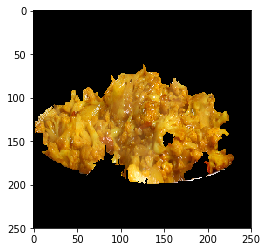

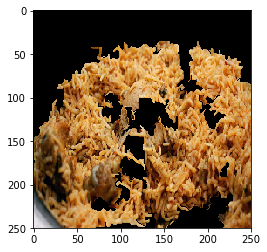

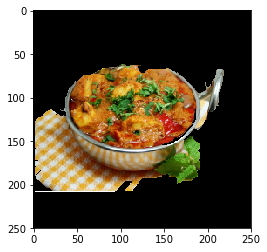

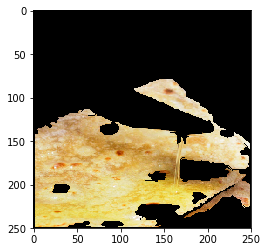

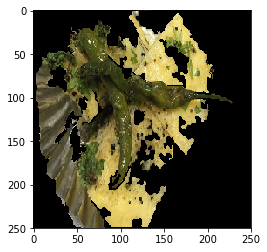

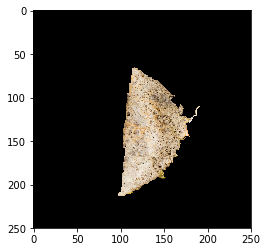

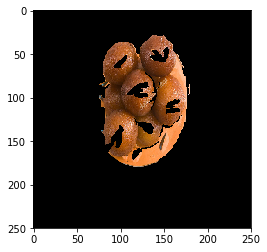

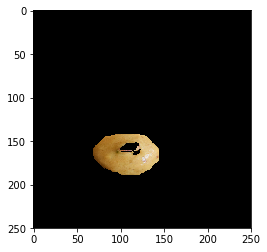

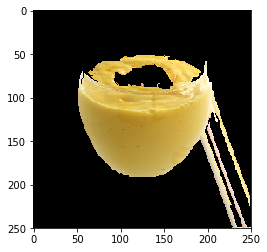

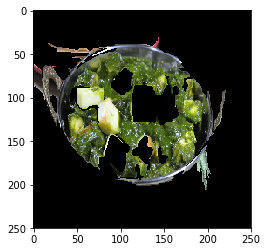

In [5]:
for training_name in train_labels:
    dir = os.path.join(train_path, training_name)
    current_label = training_name
    for file in os.listdir(dir):
        temp = file.split('.')
        input_file = dir +'/'+file
        im = main(0.5 , 8 , 500 , 100 ,input_file)        
        if(im!=0):
            image = np.array(im)
            fv_hu_moments = fd_hu_moments(image)
            fv_haralick   = fd_haralick(image)
            fv_histogram  = fd_histogram(image)
            global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
            labels.append(current_label)
            global_features.append(global_feature)
    if im !=0:
        plt.figure()
        plt.imshow(im)
        plt.show()

In [6]:
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)

h5f_data = h5py.File('output/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('output/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),np.array(labels),test_size=test_size,random_state=seed)
                                                                                          

In [9]:
import matplotlib.pyplot as plt
clf  = RandomForestClassifier(n_estimators=206, random_state=16)
count = 0
clf.fit(trainDataGlobal, trainLabelsGlobal)
y_pred = clf.predict(testDataGlobal)
for i in range(len(testLabelsGlobal)):
    if testLabelsGlobal[i] == y_pred[i]:
        count+=1
print(100*count/len(y_pred))

59.73154362416108


test/aloo_gobi
achari-aloo-gobi.jpg


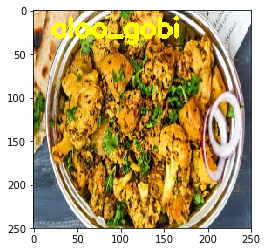

4.jpg


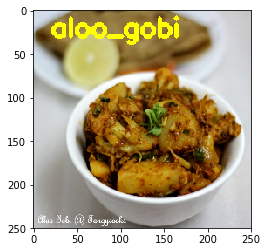

2.jpg


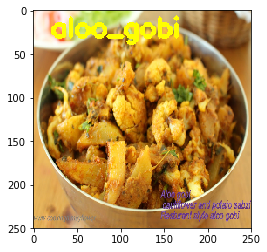

test/biryani 
2.jpg


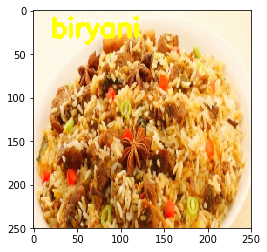

1.jpg


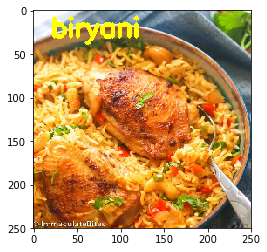

test/butter_paneer
3.jpg


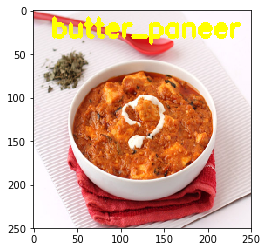

2.jpg


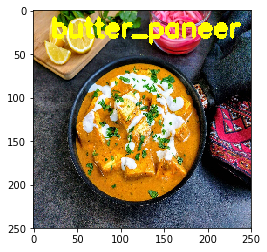

test/chapati
4.jpg


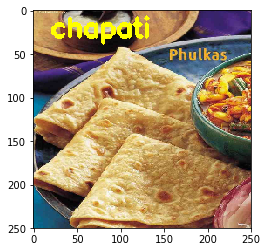

2.jpg


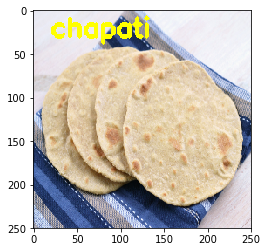

test/dhokla
3.jpg


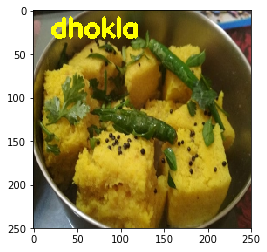

2.jpg


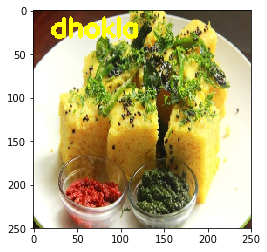

test/dosa
3.jpeg


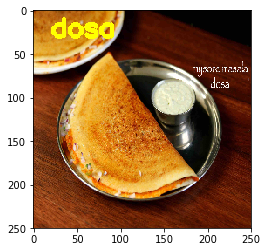

2.jpg


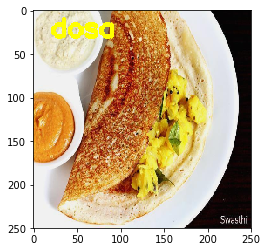

1.jpg


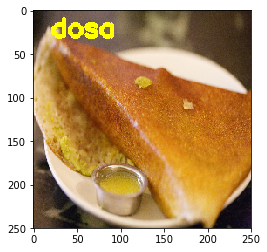

test/gulab_jamun
3.jpg


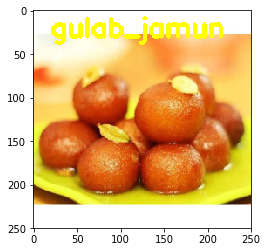

gulab-jamun.jpg


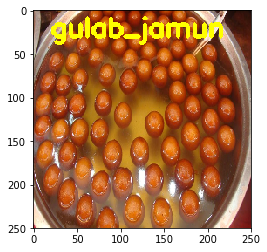

2.jpg


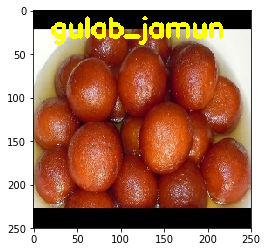

test/ladoo
3.jpg


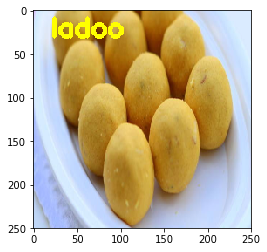

4.jpg


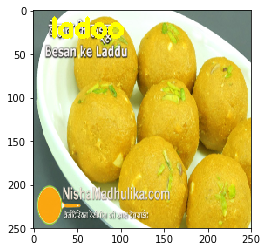

test/lassi
5.jpg


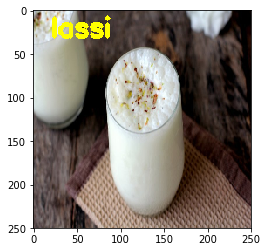

4.jpg


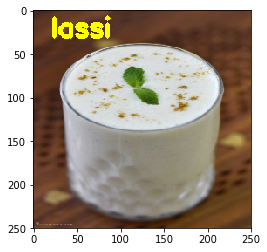

test/palak_paneer
4asd.jpg


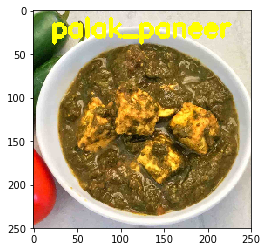

1asd.jpg


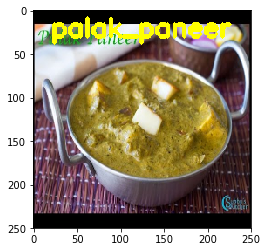

In [21]:
test_path = "test"
for test_name in train_labels:
    dir = os.path.join(test_path, test_name)
    print(dir)
    for file in os.listdir(dir):
        print(file)
        temp = file.split('.')
        address = dir+'/'+file
        image = cv2.imread(address)
        image = cv2.resize(image, fixed_size)
        image1 = main(0.5 , 8 , 500 , 100 ,address)        
        if(image1!=0):
            image1 = np.array(image1)
            fv_hu_moments = fd_hu_moments(image1)
            fv_haralick   = fd_haralick(image1)
            fv_histogram  = fd_histogram(image1)
            global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
            prediction = clf.predict(global_feature.reshape(1,-1))[0]
            cv2.putText(image, prediction, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression
count = 0
logisticRegr = LogisticRegression()
logisticRegr.fit(trainDataGlobal, trainLabelsGlobal)
y_pred = logisticRegr.predict(testDataGlobal)
for i in range(len(testLabelsGlobal)):
    if testLabelsGlobal[i] == y_pred[i]:
        count+=1
print(100*count/len(y_pred))

/home/himansh/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/himansh/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


34.899328859060404


In [23]:
from sklearn.svm import SVC  
count = 0
svclassifier = SVC(kernel='linear')  
svclassifier.fit(trainDataGlobal, trainLabelsGlobal)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = svclassifier.predict(testDataGlobal)
for i in range(len(testLabelsGlobal)):
    if testLabelsGlobal[i] == y_pred[i]:
        count+=1
print(100*count/len(y_pred))

32.214765100671144
